In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt

# DenseNet121

20 Mendeley clients, 5 CheXpert clients  
SGD, learning rate 0.01  
One-channel input  
Pretrained ImageNet

## Binary Classification


## Local Results

In [2]:
path_to_files = 'ignore/densenet_combined/'
local_file='train_results.csv'
local = pd.read_csv(path_to_files + local_file, index_col=0)

In [3]:
local.sort_values(by=['round', 'client', 'epoch'], inplace=True)
local.reset_index(inplace=True, drop=True)
local.head()

,round,client,epoch,time,train loss,val loss,val AUC
0,0,0,1,3.607634,0.378585,0.203370,0.986229
1,0,1,1,3.358298,0.374841,0.156978,0.999164
2,0,2,1,3.110322,0.352850,0.319831,0.965600
3,0,3,1,1.596104,0.489004,0.383956,0.987578
4,0,4,1,1.574155,0.543270,0.336353,0.977273


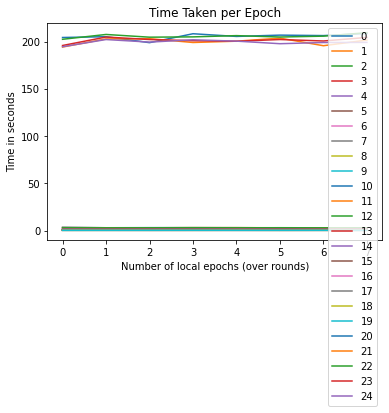

In [5]:
fig = plt.figure()

for i in range(25):
    client_df = local[local['client']==i].reset_index(drop=True)
    plt.plot(client_df.index, client_df['time'], label=client_df['client'][0])

plt.legend()
plt.xlabel('Number of local epochs (over rounds)')
plt.ylabel('Time in seconds')
plt.title('Time Taken per Epoch')

plt.show()

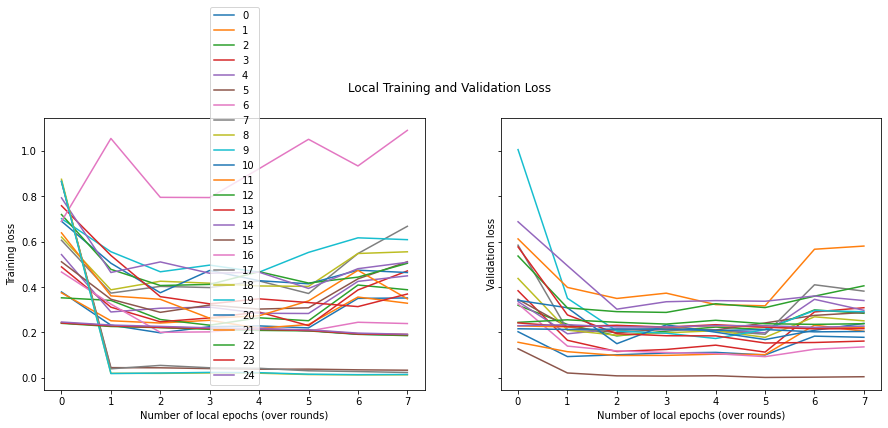

In [6]:
fig, ax = plt.subplots(1,2, sharey=True, figsize=(15,5))

for i in range(25):
    client_df = local[local['client']==i].reset_index(drop=True)
    ax[0].plot(client_df.index, client_df['train loss'], label=client_df['client'][0])

ax[0].legend()
ax[0].set_xlabel('Number of local epochs (over rounds)')
ax[0].set_ylabel('Training loss')


for i in range(25):
    client_df = local[local['client']==i].reset_index(drop=True)
    ax[1].plot(client_df.index, client_df['val loss'], label=client_df['client'][0])

ax[1].set_xlabel('Number of local epochs (over rounds)')
ax[1].set_ylabel('Validation loss')

fig.suptitle('Local Training and Validation Loss')


plt.show()

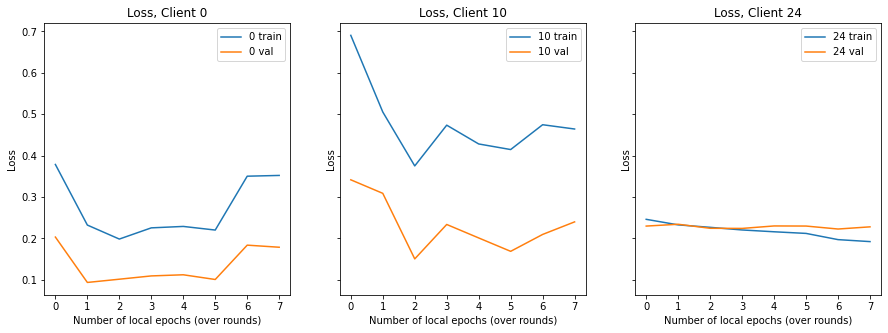

In [7]:
fig, ax = plt.subplots(1,3, sharey=True, figsize=(15,5))

for i in [0]:
    client_df = local[local['client']==i].reset_index(drop=True)
    ax[0].plot(client_df.index, client_df['train loss'], label=str(client_df['client'][0]) + ' train')
    ax[0].plot(client_df.index, client_df['val loss'], label=str(client_df['client'][0])+ ' val')


ax[0].legend()
ax[0].set_xlabel('Number of local epochs (over rounds)')
ax[0].set_ylabel('Loss')
ax[0].set_title('Loss, Client 0')

for i in [10]:
    client_df = local[local['client']==i].reset_index(drop=True)
    ax[1].plot(client_df.index, client_df['train loss'], label=str(client_df['client'][0]) + ' train')
    ax[1].plot(client_df.index, client_df['val loss'], label=str(client_df['client'][0])+ ' val')

ax[1].legend()
ax[1].set_xlabel('Number of local epochs (over rounds)')
ax[1].set_ylabel('Loss')
ax[1].set_title('Loss, Client 10')

for i in [24]:
    client_df = local[local['client']==i].reset_index(drop=True)
    ax[2].plot(client_df.index, client_df['train loss'], label=str(client_df['client'][0]) + ' train')
    ax[2].plot(client_df.index, client_df['val loss'], label=str(client_df['client'][0])+ ' val')

ax[2].legend()
ax[2].set_xlabel('Number of local epochs (over rounds)')
ax[2].set_ylabel('Loss')
ax[2].set_title('Loss, Client 24')


plt.show()

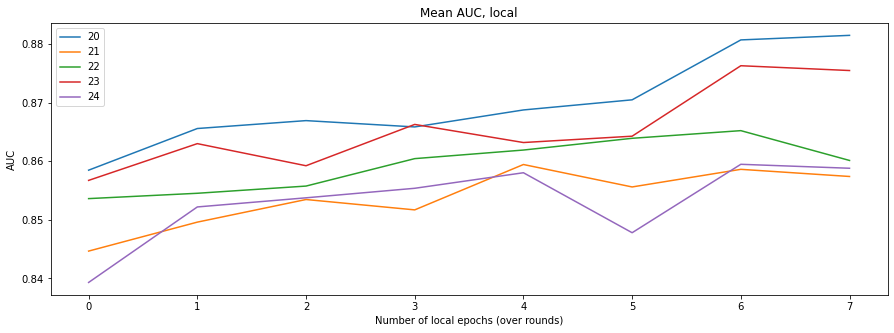

In [15]:
# CheXpert clients
fig = plt.figure(figsize=(15,5))

for i in range(20,25):
    client_df = local[local['client']==i].reset_index(drop=True)
    plt.plot(client_df.index, client_df['val AUC'], label=client_df['client'][0])

plt.legend()
plt.xlabel('Number of local epochs (over rounds)')
plt.ylabel('AUC')
plt.title('Mean AUC, local')

plt.show()

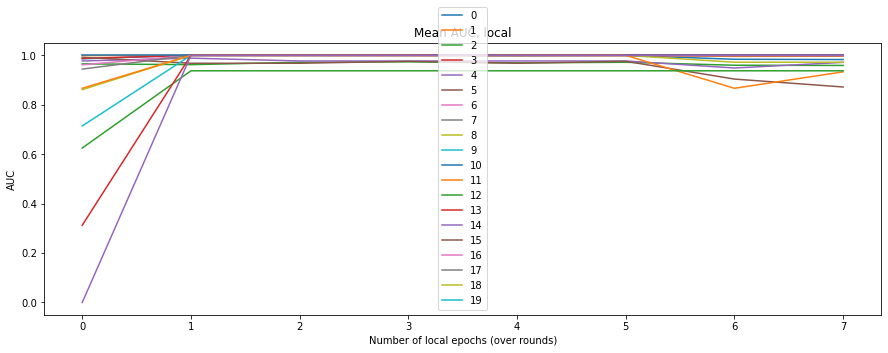

In [16]:
# Mendeley clients
fig = plt.figure(figsize=(15,5))

for i in range(20):
    client_df = local[local['client']==i].reset_index(drop=True)
    plt.plot(client_df.index, client_df['val AUC'], label=client_df['client'][0])

plt.legend()
plt.xlabel('Number of local epochs (over rounds)')
plt.ylabel('AUC')
plt.title('Mean AUC, local')

plt.show()

## Global Results

In [9]:
global_df = pd.read_csv(path_to_files+'global_validation.csv', index_col=None)

In [10]:
global_df

,round,val AUC
0,0,0.933476
1,1,0.943575
2,2,0.950546
3,3,0.949300
4,4,0.948963
5,5,0.941028
6,6,0.945202
7,7,0.931013


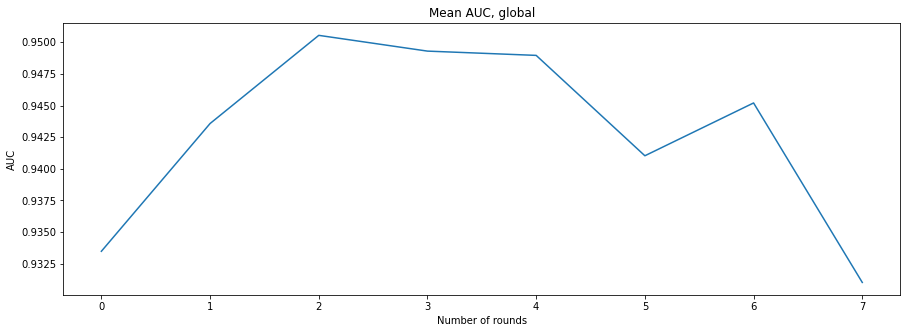

In [12]:
## Binary Classification

fig = plt.figure(figsize=(15,5))


plt.plot(global_df['round'], global_df['val AUC'])

plt.xlabel('Number of rounds')
plt.ylabel('AUC')
plt.title('Mean AUC, global')

plt.show()

# ResNet50

## Binary Classification

## Local Results

In [17]:
path_to_files = 'ignore/resnet_combined/'
local_file='train_results.csv'
local = pd.read_csv(path_to_files + local_file, index_col=0)

In [18]:
local.sort_values(by=['round', 'client', 'epoch'], inplace=True)
local.reset_index(inplace=True, drop=True)
local.head()

,round,client,epoch,time,train loss,val loss,val AUC
0,0,0,1,2.809823,0.392671,0.262140,0.988347
1,0,1,1,2.251523,0.409058,0.211169,1.000000
2,0,2,1,2.374644,0.414185,0.266977,0.952000
3,0,3,1,1.314947,0.510054,0.333605,1.000000
4,0,4,1,1.189855,0.549597,0.331681,0.988636


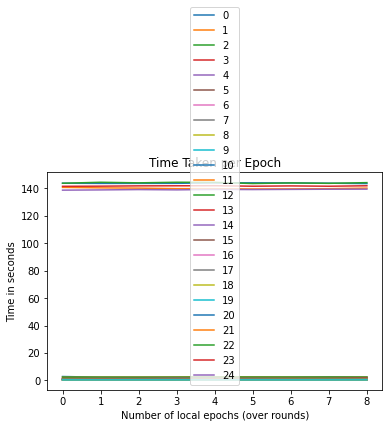

In [19]:
fig = plt.figure()

for i in range(25):
    client_df = local[local['client']==i].reset_index(drop=True)
    plt.plot(client_df.index, client_df['time'], label=client_df['client'][0])

plt.legend()
plt.xlabel('Number of local epochs (over rounds)')
plt.ylabel('Time in seconds')
plt.title('Time Taken per Epoch')

plt.show()

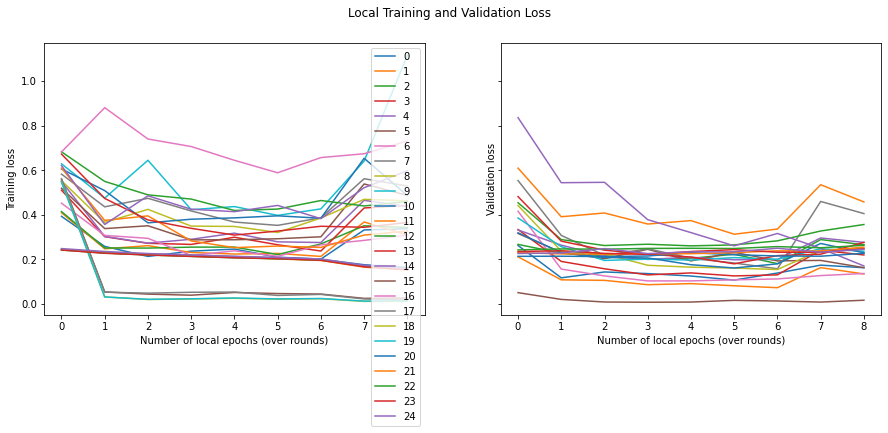

In [20]:
fig, ax = plt.subplots(1,2, sharey=True, figsize=(15,5))

for i in range(25):
    client_df = local[local['client']==i].reset_index(drop=True)
    ax[0].plot(client_df.index, client_df['train loss'], label=client_df['client'][0])

ax[0].legend()
ax[0].set_xlabel('Number of local epochs (over rounds)')
ax[0].set_ylabel('Training loss')


for i in range(25):
    client_df = local[local['client']==i].reset_index(drop=True)
    ax[1].plot(client_df.index, client_df['val loss'], label=client_df['client'][0])

ax[1].set_xlabel('Number of local epochs (over rounds)')
ax[1].set_ylabel('Validation loss')

fig.suptitle('Local Training and Validation Loss')


plt.show()

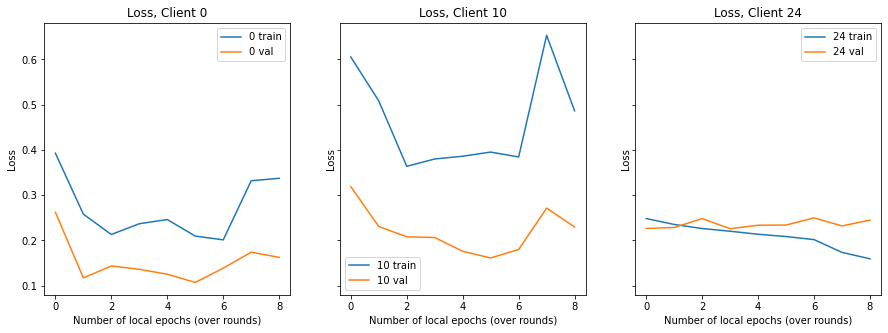

In [21]:
fig, ax = plt.subplots(1,3, sharey=True, figsize=(15,5))

for i in [0]:
    client_df = local[local['client']==i].reset_index(drop=True)
    ax[0].plot(client_df.index, client_df['train loss'], label=str(client_df['client'][0]) + ' train')
    ax[0].plot(client_df.index, client_df['val loss'], label=str(client_df['client'][0])+ ' val')


ax[0].legend()
ax[0].set_xlabel('Number of local epochs (over rounds)')
ax[0].set_ylabel('Loss')
ax[0].set_title('Loss, Client 0')

for i in [10]:
    client_df = local[local['client']==i].reset_index(drop=True)
    ax[1].plot(client_df.index, client_df['train loss'], label=str(client_df['client'][0]) + ' train')
    ax[1].plot(client_df.index, client_df['val loss'], label=str(client_df['client'][0])+ ' val')

ax[1].legend()
ax[1].set_xlabel('Number of local epochs (over rounds)')
ax[1].set_ylabel('Loss')
ax[1].set_title('Loss, Client 10')

for i in [24]:
    client_df = local[local['client']==i].reset_index(drop=True)
    ax[2].plot(client_df.index, client_df['train loss'], label=str(client_df['client'][0]) + ' train')
    ax[2].plot(client_df.index, client_df['val loss'], label=str(client_df['client'][0])+ ' val')

ax[2].legend()
ax[2].set_xlabel('Number of local epochs (over rounds)')
ax[2].set_ylabel('Loss')
ax[2].set_title('Loss, Client 24')


plt.show()

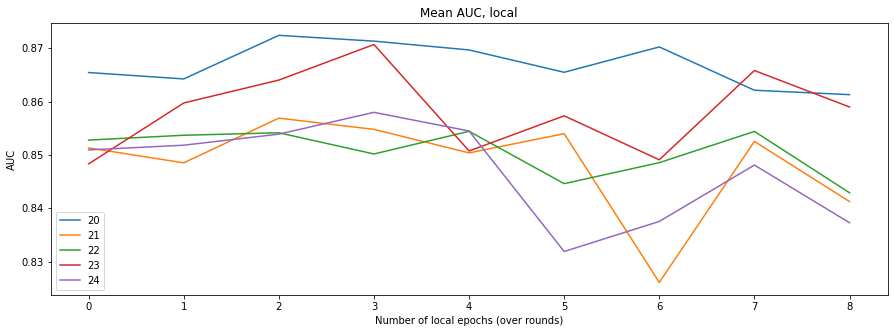

In [23]:
# CheXpert clients
fig = plt.figure(figsize=(15,5))

for i in range(20,25):
    client_df = local[local['client']==i].reset_index(drop=True)
    plt.plot(client_df.index, client_df['val AUC'], label=client_df['client'][0])

plt.legend()
plt.xlabel('Number of local epochs (over rounds)')
plt.ylabel('AUC')
plt.title('Mean AUC, local')

plt.show()

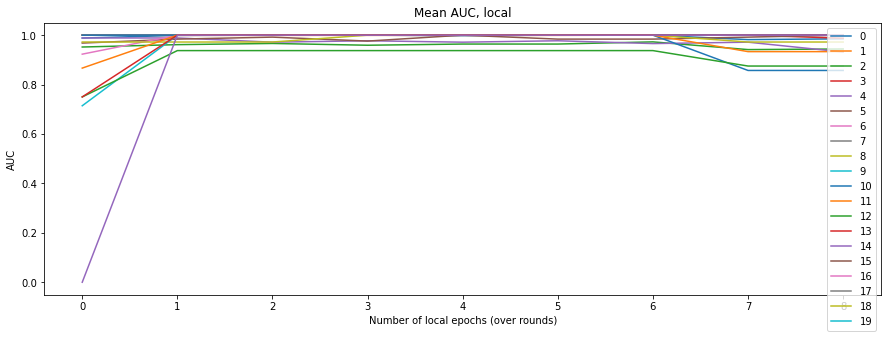

In [24]:
# Mendeley clients
fig = plt.figure(figsize=(15,5))

for i in range(20):
    client_df = local[local['client']==i].reset_index(drop=True)
    plt.plot(client_df.index, client_df['val AUC'], label=client_df['client'][0])

plt.legend()
plt.xlabel('Number of local epochs (over rounds)')
plt.ylabel('AUC')
plt.title('Mean AUC, local')

plt.show()

## Global Results

In [25]:
global_df = pd.read_csv(path_to_files+'global_validation.csv', index_col=None)

In [26]:
global_df

,round,val AUC
0,0,0.927787
1,1,0.945064
2,2,0.946685
3,3,0.947157
4,4,0.939753
5,5,0.931603
6,6,0.940390
7,7,0.922079
8,8,0.888753


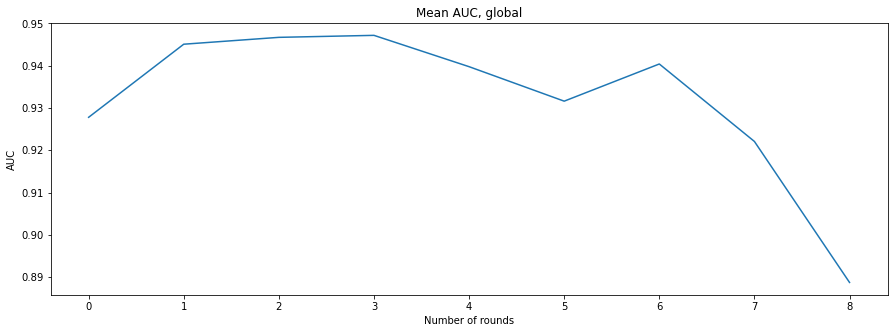

In [27]:
fig = plt.figure(figsize=(15,5))


plt.plot(global_df['round'], global_df['val AUC'])

plt.xlabel('Number of rounds')
plt.ylabel('AUC')
plt.title('Mean AUC, global')

plt.show()

# Frozen batch norm layers

# DenseNet121

20 Mendeley clients, 5 CheXpert clients  
SGD, learning rate 0.01  
One-channel input  
Pretrained ImageNet

## Binary Classification


## Local Results

In [2]:
path_to_files = 'ignore/densenet_bn_freeze/'
local_file='train_results.csv'
local = pd.read_csv(path_to_files + local_file, index_col=0)

In [3]:
local.sort_values(by=['round', 'client', 'epoch'], inplace=True)
local.reset_index(inplace=True, drop=True)
local.head()

,round,client,epoch,time,train loss,val loss,val AUC
0,0,0,1,3.408577,0.514943,0.288144,0.996822
1,0,1,1,2.861129,0.522066,0.577602,0.983278
2,0,2,1,3.041131,0.564079,0.514523,0.964800
3,0,3,1,1.463921,0.601019,0.394295,1.000000
4,0,4,1,1.350230,0.742303,0.591705,0.806818


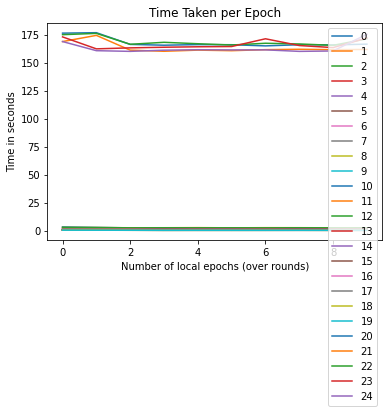

In [4]:
fig = plt.figure()

for i in range(25):
    client_df = local[local['client']==i].reset_index(drop=True)
    plt.plot(client_df.index, client_df['time'], label=client_df['client'][0])

plt.legend()
plt.xlabel('Number of local epochs (over rounds)')
plt.ylabel('Time in seconds')
plt.title('Time Taken per Epoch')

plt.show()

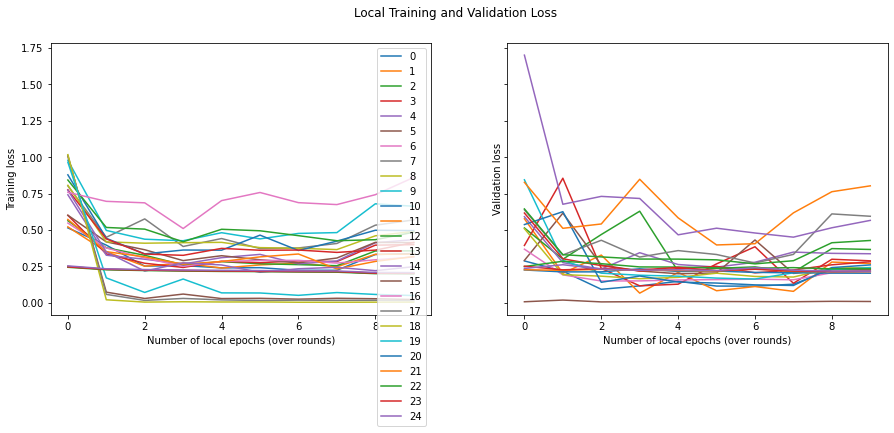

In [5]:
fig, ax = plt.subplots(1,2, sharey=True, figsize=(15,5))

for i in range(25):
    client_df = local[local['client']==i].reset_index(drop=True)
    ax[0].plot(client_df.index, client_df['train loss'], label=client_df['client'][0])

ax[0].legend()
ax[0].set_xlabel('Number of local epochs (over rounds)')
ax[0].set_ylabel('Training loss')


for i in range(25):
    client_df = local[local['client']==i].reset_index(drop=True)
    ax[1].plot(client_df.index, client_df['val loss'], label=client_df['client'][0])

ax[1].set_xlabel('Number of local epochs (over rounds)')
ax[1].set_ylabel('Validation loss')

fig.suptitle('Local Training and Validation Loss')


plt.show()

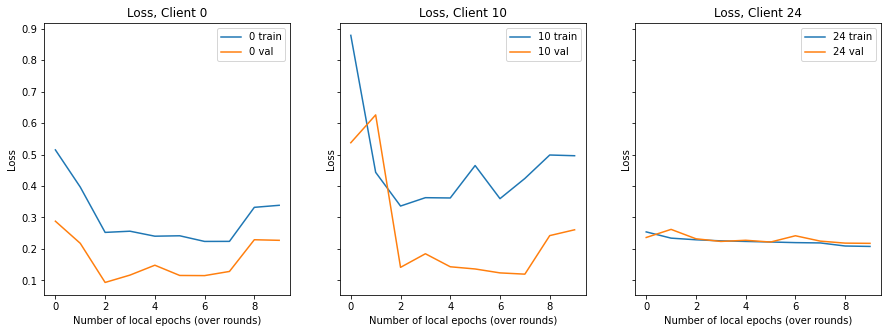

In [6]:
fig, ax = plt.subplots(1,3, sharey=True, figsize=(15,5))

for i in [0]:
    client_df = local[local['client']==i].reset_index(drop=True)
    ax[0].plot(client_df.index, client_df['train loss'], label=str(client_df['client'][0]) + ' train')
    ax[0].plot(client_df.index, client_df['val loss'], label=str(client_df['client'][0])+ ' val')


ax[0].legend()
ax[0].set_xlabel('Number of local epochs (over rounds)')
ax[0].set_ylabel('Loss')
ax[0].set_title('Loss, Client 0')

for i in [10]:
    client_df = local[local['client']==i].reset_index(drop=True)
    ax[1].plot(client_df.index, client_df['train loss'], label=str(client_df['client'][0]) + ' train')
    ax[1].plot(client_df.index, client_df['val loss'], label=str(client_df['client'][0])+ ' val')

ax[1].legend()
ax[1].set_xlabel('Number of local epochs (over rounds)')
ax[1].set_ylabel('Loss')
ax[1].set_title('Loss, Client 10')

for i in [24]:
    client_df = local[local['client']==i].reset_index(drop=True)
    ax[2].plot(client_df.index, client_df['train loss'], label=str(client_df['client'][0]) + ' train')
    ax[2].plot(client_df.index, client_df['val loss'], label=str(client_df['client'][0])+ ' val')

ax[2].legend()
ax[2].set_xlabel('Number of local epochs (over rounds)')
ax[2].set_ylabel('Loss')
ax[2].set_title('Loss, Client 24')


plt.show()

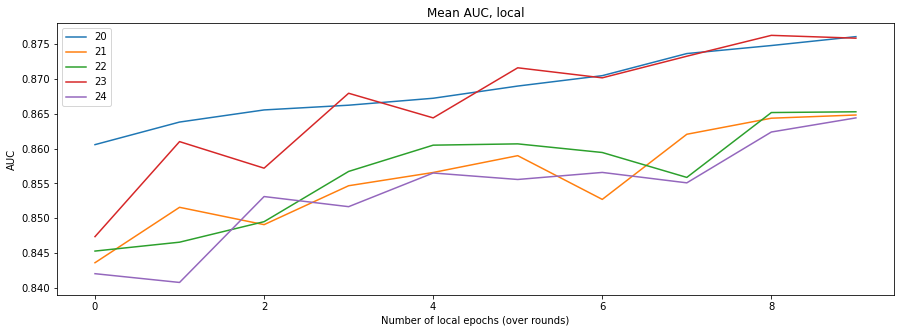

In [7]:
# CheXpert clients
fig = plt.figure(figsize=(15,5))

for i in range(20,25):
    client_df = local[local['client']==i].reset_index(drop=True)
    plt.plot(client_df.index, client_df['val AUC'], label=client_df['client'][0])

plt.legend()
plt.xlabel('Number of local epochs (over rounds)')
plt.ylabel('AUC')
plt.title('Mean AUC, local')

plt.show()

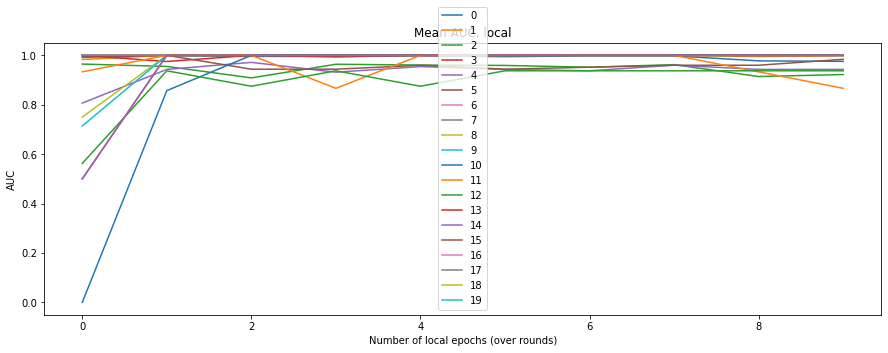

In [8]:
# Mendeley clients
fig = plt.figure(figsize=(15,5))

for i in range(20):
    client_df = local[local['client']==i].reset_index(drop=True)
    plt.plot(client_df.index, client_df['val AUC'], label=client_df['client'][0])

plt.legend()
plt.xlabel('Number of local epochs (over rounds)')
plt.ylabel('AUC')
plt.title('Mean AUC, local')

plt.show()

## Global Results

In [9]:
global_df = pd.read_csv(path_to_files+'global_validation.csv', index_col=None)

In [10]:
global_df

,round,val AUC
0,0,0.939604
1,1,0.945367
2,2,0.938540
3,3,0.945399
4,4,0.948561
5,5,0.944552
6,6,0.944515
7,7,0.944314
8,8,0.942808
9,9,0.943266


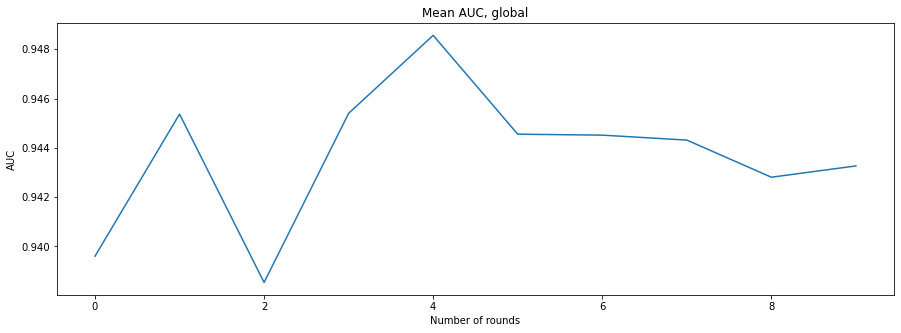

In [11]:
## Binary Classification

fig = plt.figure(figsize=(15,5))


plt.plot(global_df['round'], global_df['val AUC'])

plt.xlabel('Number of rounds')
plt.ylabel('AUC')
plt.title('Mean AUC, global')

plt.show()

# ResNet50

## Binary Classification

## Local Results

In [12]:
path_to_files = 'ignore/resnet_bn_freeze/'
local_file='train_results.csv'
local = pd.read_csv(path_to_files + local_file, index_col=0)

In [13]:
local.sort_values(by=['round', 'client', 'epoch'], inplace=True)
local.reset_index(inplace=True, drop=True)
local.head()

,round,client,epoch,time,train loss,val loss,val AUC
0,0,0,1,2.450249,0.468175,0.203430,0.993644
1,0,1,1,2.134983,0.599473,0.548232,0.988294
2,0,2,1,2.174938,0.653023,0.522637,0.944800
3,0,3,1,1.261925,0.736842,0.449521,0.993789
4,0,4,1,1.288056,0.824044,0.472066,0.971591


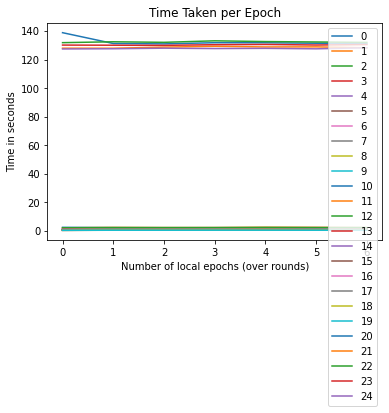

In [14]:
fig = plt.figure()

for i in range(25):
    client_df = local[local['client']==i].reset_index(drop=True)
    plt.plot(client_df.index, client_df['time'], label=client_df['client'][0])

plt.legend()
plt.xlabel('Number of local epochs (over rounds)')
plt.ylabel('Time in seconds')
plt.title('Time Taken per Epoch')

plt.show()

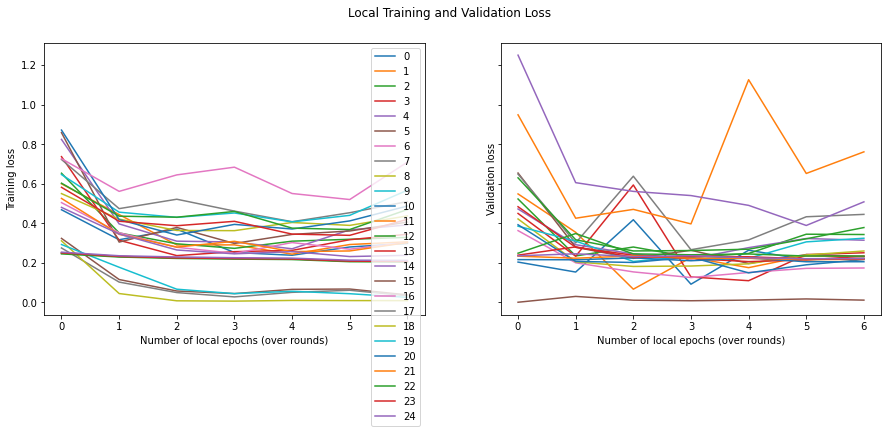

In [15]:
fig, ax = plt.subplots(1,2, sharey=True, figsize=(15,5))

for i in range(25):
    client_df = local[local['client']==i].reset_index(drop=True)
    ax[0].plot(client_df.index, client_df['train loss'], label=client_df['client'][0])

ax[0].legend()
ax[0].set_xlabel('Number of local epochs (over rounds)')
ax[0].set_ylabel('Training loss')


for i in range(25):
    client_df = local[local['client']==i].reset_index(drop=True)
    ax[1].plot(client_df.index, client_df['val loss'], label=client_df['client'][0])

ax[1].set_xlabel('Number of local epochs (over rounds)')
ax[1].set_ylabel('Validation loss')

fig.suptitle('Local Training and Validation Loss')


plt.show()

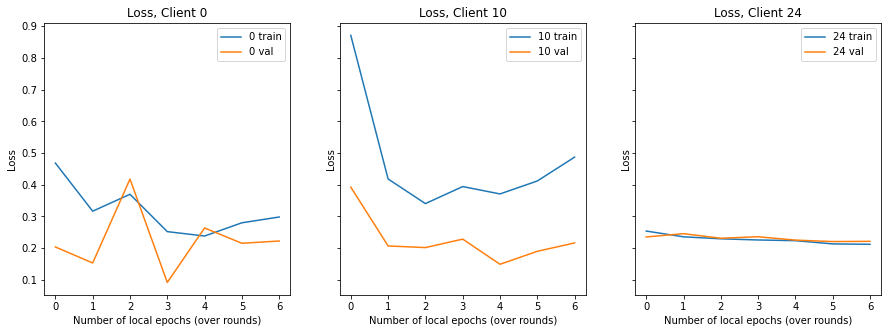

In [16]:
fig, ax = plt.subplots(1,3, sharey=True, figsize=(15,5))

for i in [0]:
    client_df = local[local['client']==i].reset_index(drop=True)
    ax[0].plot(client_df.index, client_df['train loss'], label=str(client_df['client'][0]) + ' train')
    ax[0].plot(client_df.index, client_df['val loss'], label=str(client_df['client'][0])+ ' val')


ax[0].legend()
ax[0].set_xlabel('Number of local epochs (over rounds)')
ax[0].set_ylabel('Loss')
ax[0].set_title('Loss, Client 0')

for i in [10]:
    client_df = local[local['client']==i].reset_index(drop=True)
    ax[1].plot(client_df.index, client_df['train loss'], label=str(client_df['client'][0]) + ' train')
    ax[1].plot(client_df.index, client_df['val loss'], label=str(client_df['client'][0])+ ' val')

ax[1].legend()
ax[1].set_xlabel('Number of local epochs (over rounds)')
ax[1].set_ylabel('Loss')
ax[1].set_title('Loss, Client 10')

for i in [24]:
    client_df = local[local['client']==i].reset_index(drop=True)
    ax[2].plot(client_df.index, client_df['train loss'], label=str(client_df['client'][0]) + ' train')
    ax[2].plot(client_df.index, client_df['val loss'], label=str(client_df['client'][0])+ ' val')

ax[2].legend()
ax[2].set_xlabel('Number of local epochs (over rounds)')
ax[2].set_ylabel('Loss')
ax[2].set_title('Loss, Client 24')


plt.show()

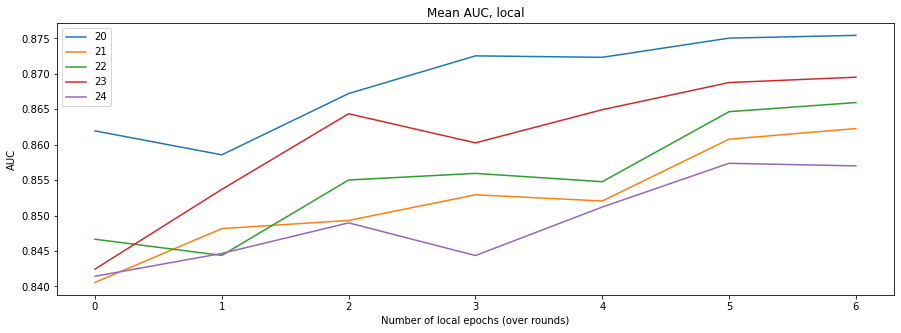

In [17]:
# CheXpert clients
fig = plt.figure(figsize=(15,5))

for i in range(20,25):
    client_df = local[local['client']==i].reset_index(drop=True)
    plt.plot(client_df.index, client_df['val AUC'], label=client_df['client'][0])

plt.legend()
plt.xlabel('Number of local epochs (over rounds)')
plt.ylabel('AUC')
plt.title('Mean AUC, local')

plt.show()

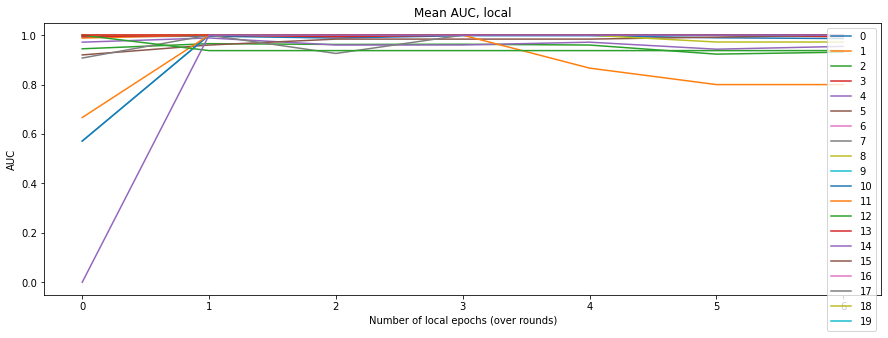

In [18]:
# Mendeley clients
fig = plt.figure(figsize=(15,5))

for i in range(20):
    client_df = local[local['client']==i].reset_index(drop=True)
    plt.plot(client_df.index, client_df['val AUC'], label=client_df['client'][0])

plt.legend()
plt.xlabel('Number of local epochs (over rounds)')
plt.ylabel('AUC')
plt.title('Mean AUC, local')

plt.show()

## Global Results

In [19]:
global_df = pd.read_csv(path_to_files+'global_validation.csv', index_col=None)

In [20]:
global_df

,round,val AUC
0,0,0.940833
1,1,0.945472
2,2,0.934061
3,3,0.932368
4,4,0.933668
5,5,0.938994
6,6,0.941688


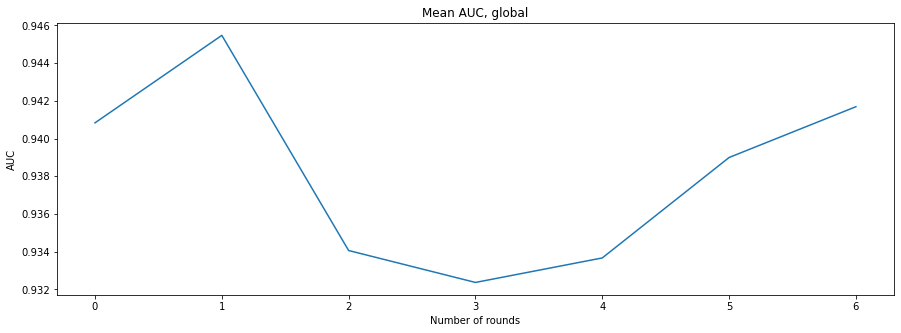

In [21]:
fig = plt.figure(figsize=(15,5))


plt.plot(global_df['round'], global_df['val AUC'])

plt.xlabel('Number of rounds')
plt.ylabel('AUC')
plt.title('Mean AUC, global')

plt.show()